In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.layers import LSTM, Dense
from sklearn.utils.class_weight import compute_class_weight

In [2]:
data = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\PS - 1\blizzard_final_complete_hourly_data_2016_2019.csv")
data = pd.DataFrame(data)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
X = data[['tempr', 'ap', 'ws', 'rh']]
y = data['blizzard']

In [3]:
# Reshape the input data for a CNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
class_weights = {0:1, 1:5}

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
X_scaled = scaler.transform(X.reshape(-1, 1)).reshape(X.shape)

In [6]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),class_weight=class_weights)

Epoch 1/10
1118/1118 [==============================] - 9s 6ms/step - loss: 0.3375 - accuracy: 0.9795 - val_loss: 0.3712 - val_accuracy: 0.9832
Epoch 2/10
1118/1118 [==============================] - 6s 5ms/step - loss: 0.3206 - accuracy: 0.9804 - val_loss: 0.4551 - val_accuracy: 0.9832
Epoch 3/10
1118/1118 [==============================] - 5s 5ms/step - loss: 0.3097 - accuracy: 0.9804 - val_loss: 0.5106 - val_accuracy: 0.9832
Epoch 4/10
1118/1118 [==============================] - 6s 5ms/step - loss: 0.2885 - accuracy: 0.9804 - val_loss: 0.5787 - val_accuracy: 0.9832
Epoch 5/10
1118/1118 [==============================] - 5s 5ms/step - loss: 0.2374 - accuracy: 0.9790 - val_loss: 0.6064 - val_accuracy: 0.9831
Epoch 6/10
1118/1118 [==============================] - 5s 5ms/step - loss: 0.2015 - accuracy: 0.9763 - val_loss: 0.6134 - val_accuracy: 0.9829
Epoch 7/10
1118/1118 [==============================] - 5s 5ms/step - loss: 0.1836 - accuracy: 0.9739 - val_loss: 0.6125 - val_accuracy:

In [8]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

280/280 [==============================] - 1s 2ms/step


In [9]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9861266502573283


In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8755   33]
 [  91   59]]


In [11]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.48760330578512395


In [12]:
blizzard_predicted_prob =  model.predict(X_scaled)
blizzard_predicted = (blizzard_predicted_prob > 0.5).astype(int)

1397/1397 [==============================] - 3s 2ms/step


In [13]:
data['blizzard_predicted'] = blizzard_predicted
data

,date,tempr,ap,ws,rh,blizzard,blizzard_predicted
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0,0
...,...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0,0


In [14]:
conf_matrix = confusion_matrix(data['blizzard'], data['blizzard_predicted'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[43654   182]
 [  552   300]]


In [15]:
data['is_it'] = ['1' if data['blizzard'][i] == 1 and data['blizzard_predicted'][i] == 1 else '2' if data['blizzard'][i] == 0 and data['blizzard_predicted'][i] == 1 else '3' if data['blizzard'][i] == 1 and data['blizzard_predicted'][i] == 0 else 0 for i in range(len(data))]
data

,date,tempr,ap,ws,rh,blizzard,blizzard_predicted,is_it
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0,0,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0,0,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0,0,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0,0,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0,0,0
...,...,...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0,0,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0,0,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0,0,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0,0,0


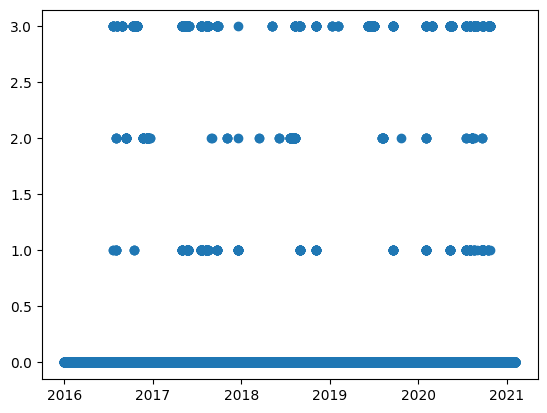

In [16]:
plt.scatter(data['date'],data['is_it'])

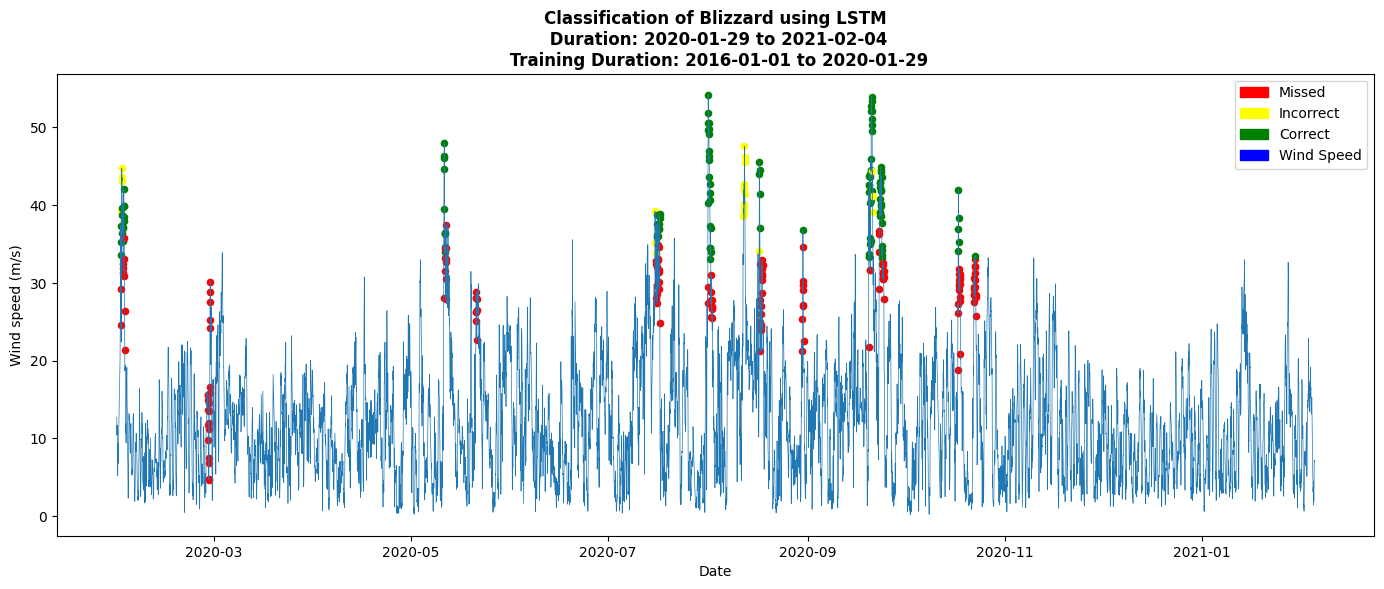

In [17]:
plt.figure(figsize=(17, 6))
plt.plot(data['date'][-8904: ],data['ws'][-8904: ], linewidth = 0.5)
for i in range(len(data)-8904,len(data)):
    if data['is_it'][i] == '1':
        plt.scatter(data['date'][i], data['ws'][i], s=20 ,c='green')
    elif data['is_it'][i] == '2':
        plt.scatter(data['date'][i], data['ws'][i],s=20 ,c='yellow')
    elif data['is_it'][i] == '3':
        plt.scatter(data['date'][i], data['ws'][i], s=20,c='red')
plt.title("Classification of Blizzard using LSTM\n Duration: 2020-01-29 to 2021-02-04\n Training Duration: 2016-01-01 to 2020-01-29", fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Wind speed (m/s)')
pop_a = mpatches.Patch(color='red', label='Missed')
pop_b = mpatches.Patch(color='yellow', label='Incorrect')
pop_c = mpatches.Patch(color='green', label='Correct')
pop_d = mpatches.Patch(color='blue', label='Wind Speed')
plt.legend(handles=[pop_a,pop_b, pop_c, pop_d])
plt.savefig("Blizzard_LSTM.png", format='png', dpi=800)
